In [24]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [25]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv'

In [26]:
forders11 = os.listdir(curr_dir+"\\data\\"+"\\outlier_train_val")
forders11

['2001_uv_nooutlier.csv',
 '2002_uv_nooutlier.csv',
 '2003_uv_nooutlier.csv',
 '2004_uv_nooutlier.csv',
 '2005_uv_nooutlier.csv',
 '2006_uv_nooutlier.csv',
 '2007_uv_nooutlier.csv',
 '2008_uv_nooutlier.csv',
 '2009_uv_nooutlier.csv',
 '2010_uv_nooutlier.csv',
 '2011_uv_nooutlier.csv',
 '2012_uv_nooutlier.csv',
 '2101_uv_nooutlier.csv',
 '2102_uv_nooutlier.csv',
 '2103_uv_nooutlier.csv',
 '2104_uv_nooutlier.csv',
 '2105_uv_nooutlier.csv',
 '2106_uv_nooutlier.csv',
 '2107_uv_nooutlier.csv',
 '2108_uv_nooutlier.csv',
 '2109_uv_nooutlier.csv',
 '2110_uv_nooutlier.csv',
 '2111_uv_nooutlier.csv',
 '2112_uv_nooutlier.csv']

Text(0.5, 1.0, '2020.06')

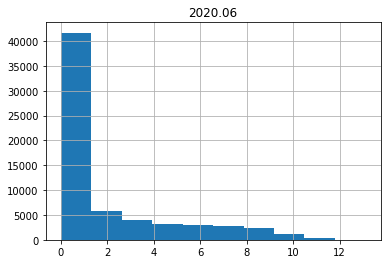

In [13]:
pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+forders11[5])['uv'].hist()
plt.title('2020.06')

In [29]:
list(pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+forders11[5])['uv'].values)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [42]:
dd = list(pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+forders11[5])['uv'].values)
    
pd.set_option('display.max_rows', None)
df = pd.DataFrame(dd)
df_num = pd.DataFrame(df.value_counts())
df_ratio = pd.DataFrame(df.value_counts()/len(df))
df_0620 = pd.concat([df_num,df_ratio],axis=1)
df_0620
df_0620.columns=['0620_num','0620_ratio']
df_0620.to_csv('0620_uv_range.csv')
df_0620

,0620_num,0620_ratio
0,,
0.0,28094,0.437390
0.1,2809,0.043733
0.2,1692,0.026342
0.3,1305,0.020317
0.4,1264,0.019679
0.5,964,0.015008
0.6,962,0.014977
0.7,779,0.012128
1.1,704,0.010960


Text(0.5, 1.0, '2021.06')

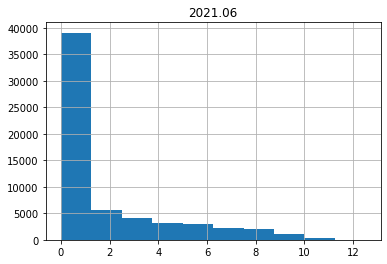

In [17]:
pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+forders11[12+5])['uv'].hist()
plt.title('2021.06')

In [43]:
dd = list(pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+forders11[12+5])['uv'].values)
    
# pd.set_option('display.max_rows', None)
df = pd.DataFrame(dd)
df_num = pd.DataFrame(df.value_counts())
df_ratio = pd.DataFrame(df.value_counts()/len(df))
df_0621 = pd.concat([df_num,df_ratio],axis=1)
df_0621
df_0621.columns=['0621_num','0621_ratio']
df_0621.to_csv('0621_uv_range.csv')
df_0621

,0621_num,0621_ratio
0,,
0.0,24582,0.405577
0.1,4495,0.074163
0.2,1690,0.027883
0.3,1286,0.021218
0.4,1222,0.020162
0.5,959,0.015822
0.6,828,0.013661
0.7,767,0.012655
0.8,716,0.011813


Text(0.5, 1.0, '2020.09')

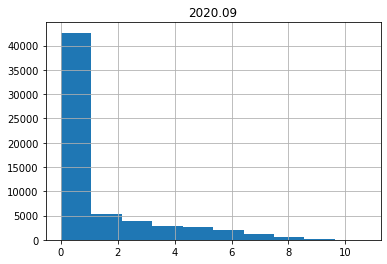

In [23]:
pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+forders11[8])['uv'].hist()
plt.title('2020.09')

# uv_ratio

In [5]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\train_val")
forders_tr

['202001_uv.csv',
 '202002_uv.csv',
 '202003_uv.csv',
 '202004_uv.csv',
 '202005_uv.csv',
 '202006_uv.csv',
 '202007_uv.csv',
 '202008_uv.csv',
 '202009_uv.csv',
 '202010_uv.csv',
 '202011_uv.csv',
 '202012_uv.csv',
 '202101_uv.csv',
 '202102_uv.csv',
 '202103_uv.csv',
 '202104_uv.csv',
 '202105_uv.csv',
 '202106_uv.csv',
 '202107_uv.csv',
 '202108_uv.csv',
 '202109_uv.csv',
 '202110_uv.csv',
 '202111_uv.csv',
 '202112_uv.csv']

In [4]:
forders_tr1 = []
for i in range(0,9):
    df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\train_val\\")+forders_tr[i])
    d = list(df.columns)
    for j in range(1,len(d)):
        d[j] = d[j].replace("20200"+str(i+1)+"_uv.", "")
    df.columns = d
    df.drop('Unnamed: 0', axis=1, inplace=True)
    forders_tr1.append(df)

for i in range(9,12):
    df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\train_val\\")+forders_tr[i])
    d = list(df.columns)
    for j in range(1,len(d)):
        d[j] = d[j].replace("2020"+str(i+1)+"_uv.", "")
    df.columns = d
    df.drop('Unnamed: 0', axis=1, inplace=True)
    forders_tr1.append(df)

    
for i in range(12,21):
    df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\train_val\\")+forders_tr[i])
    d = list(df.columns)
    for j in range(1,len(d)):
        d[j] = d[j].replace("20210"+str(i+1-12)+"_uv.", "")
    df.columns = d
    df.drop('Unnamed: 0', axis=1, inplace=True)
    forders_tr1.append(df)

for i in range(21,24):
    df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\train_val\\")+forders_tr[i])
    d = list(df.columns)
    for j in range(1,len(d)):
        d[j] = d[j].replace("2021"+str(i+1-12)+"_uv.", "")
    df.columns = d
    df.drop('Unnamed: 0', axis=1, inplace=True)
    forders_tr1.append(df)

In [5]:
# 새로운 데이터 프레임 생성
train = pd.DataFrame()

for files in forders_tr1:
    train = pd.concat([train, files])
train

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200101,0,13,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,...,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0
1,20200101,0,105,128.89098,37.75147,0.0,-0.00057,0.00057,0.00030,-0.00030,...,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3
2,20200101,0,108,126.96500,37.57100,-999.0,0.00000,0.00000,-0.00089,-0.00075,...,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3
3,20200101,0,112,126.62490,37.47772,0.0,-0.00057,-0.00057,-0.00060,0.00015,...,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3
4,20200101,0,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,...,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66955,20211231,2350,146,127.11900,35.84080,0.1,-0.00057,0.00000,-0.00060,0.00000,...,244.71129,264.82744,264.95943,264.36433,254.82929,162.52921,41.81018,-8.87355,62.90,3
66956,20211231,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00179,-0.00015,...,241.75728,259.19303,257.86443,257.39333,249.08495,163.96606,41.52495,-8.99640,82.00,2
66957,20211231,2350,156,126.89158,35.17294,0.0,0.00000,0.00000,0.00000,0.00105,...,242.90744,260.33453,260.00405,259.18646,250.92709,162.84572,41.04849,-8.87987,72.38,3
66958,20211231,2350,159,129.03203,35.10468,0.0,-0.00057,-0.00057,0.00089,-0.00015,...,242.68420,259.36253,258.24370,256.93511,247.71243,164.15158,40.96396,-8.99480,69.56,3


# Train set "-999"비율 

In [17]:
ratio=[]
num = []
for i in range(len(train.columns)):
    ratio.append(len(train[train[train.columns[i]] == -999.0])/len(train))
    num.append(len(train[train[train.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.033697497086689975,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.01144170846633227,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.011437908496732025,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [30]:
tr_ratio = pd.DataFrame(ratio)      # columns='train_ratio'
tr_ratio.index = train.columns
tr_ratio

tr_num = pd.DataFrame(num)     # columns='train_num'
tr_num.index = train.columns
tr_num

,0
yyyymmdd,0
hhnn,0
stn,0
lon,0
lat,0
uv,53207
band1,18060
band2,18060
band3,18060
band4,18060


In [32]:
train_na = pd.concat([tr_num, tr_ratio], axis=1)
train_na

,0,0
yyyymmdd,0,0.000000
hhnn,0,0.000000
stn,0,0.000000
lon,0,0.000000
lat,0,0.000000
uv,53207,0.033697
band1,18060,0.011438
band2,18060,0.011438
band3,18060,0.011438
band4,18060,0.011438


# 검증 셋 "-999"비율

In [6]:
forders_te = os.listdir(curr_dir+"\\data\\"+"\\test")
forders_te

df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\test\\")+forders_te[0])
d = list(df.columns)
for j in range(1,len(d)):
    d[j] = d[j].replace("202206_uv.", "")
df.columns = d
df.drop('Unnamed: 0', axis=1, inplace=True)
test = df
test

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,-999,38.96359,-999,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,-999,43.95463,-999,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,-999,43.77999,-999,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,-999,43.67046,-999,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,-999,43.74521,-999,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,-999,41.81018,-999,62.90,3
51851,20220625,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,-999,41.52495,-999,82.00,2
51852,20220625,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,-999,41.04849,-999,72.38,3
51853,20220625,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,-999,40.96396,-999,69.56,3


In [35]:
ratio_te=[]
num_te = []
for i in range(len(test.columns)):
    ratio_te.append(len(test[test[test.columns[i]] == -999.0])/len(test))
    num_te.append(len(test[test[test.columns[i]] == -999.0]))

te_ratio = pd.DataFrame(ratio_te)      # columns='train_ratio'
te_ratio.index = test.columns
te_ratio

te_num = pd.DataFrame(num_te)     # columns='train_num'
te_num.index = test.columns
te_num

test_na = pd.concat([te_num, te_ratio], axis=1)
test_na

,0,0
yyyymmdd,0,0.000000
hhnn,0,0.000000
stn,0,0.000000
lon,0,0.000000
lat,0,0.000000
uv,0,0.000000
band1,375,0.007232
band2,375,0.007232
band3,375,0.007232
band4,375,0.007232


In [40]:
na = pd.concat([train_na, test_na], axis=1)
na.columns = ['train_num','train_ratio','검증셋_num','검증셋_ratio']
na

,train_num,train_ratio,검증셋_num,검증셋_ratio
yyyymmdd,0,0.000000,0,0.000000
hhnn,0,0.000000,0,0.000000
stn,0,0.000000,0,0.000000
lon,0,0.000000,0,0.000000
lat,0,0.000000,0,0.000000
uv,53207,0.033697,0,0.000000
band1,18060,0.011438,375,0.007232
band2,18060,0.011438,375,0.007232
band3,18060,0.011438,375,0.007232
band4,18060,0.011438,375,0.007232


In [42]:
# na.to_csv('NA_ratio_uv.csv')